# Labbration covid-19
### Uppgift 1
Börja med att manuellt läsa Excel-filerna och de olika bladen i varje dokument. Använd därefter Pandas för
att läsa in bladet: "Veckodata Riket" i covid19-filen. 



In [1]:
import pandas as pd

excel_file_path = "Labb-data/Folkhalsomyndigheten_Covid19.xlsx"


df = pd.read_excel(excel_file_path, sheet_name=6)

df

,år,veckonummer,Region,Antal_fall_vecka,Kum_antal_fall,Antal_intensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Kum_antal_avlidna,Antal_fall_100000inv_vecka,Kum_fall_100000inv
0,2020,1,Blekinge,0,0,0,0,0,0,0,0
1,2020,2,Blekinge,0,0,0,0,0,0,0,0
2,2020,3,Blekinge,0,0,0,0,0,0,0,0
3,2020,4,Blekinge,0,0,0,0,0,0,0,0
4,2020,5,Blekinge,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3082,2022,38,Östergötland,248,97976,1,437,5,871,53,20973
3083,2022,39,Östergötland,238,98214,2,439,7,878,51,21024
3084,2022,40,Östergötland,204,98418,0,439,3,881,44,21067
3085,2022,41,Östergötland,145,98563,1,440,4,885,31,21098


### Använder df.info och df.desribe för att få en snabb överblick 
- df.info: ger överblick av datatyper
- df.describe: ger statistisk sammanfattningar för numeriska kolumner 

In [2]:
print("Info:")
print(df.info())

print("\nDescribe:")
print(df.describe())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3087 entries, 0 to 3086
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   år                           3087 non-null   int64 
 1   veckonummer                  3087 non-null   int64 
 2   Region                       3087 non-null   object
 3   Antal_fall_vecka             3087 non-null   int64 
 4   Kum_antal_fall               3087 non-null   int64 
 5   Antal_intensivvårdade_vecka  3087 non-null   int64 
 6   Kum_antal_intensivvårdade    3087 non-null   int64 
 7   Antal_avlidna_vecka          3087 non-null   int64 
 8   Kum_antal_avlidna            3087 non-null   int64 
 9   Antal_fall_100000inv_vecka   3087 non-null   int64 
 10  Kum_fall_100000inv           3087 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 265.4+ KB
None

Describe:
                år  veckonummer  Antal_fall_vecka  Kum_antal_fall  \
count  3

### Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" 


In [3]:
df["Vecka"] = df["år"].astype(str) + "v" + df["veckonummer"].astype(str)
df

,år,veckonummer,Region,Antal_fall_vecka,Kum_antal_fall,Antal_intensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Kum_antal_avlidna,Antal_fall_100000inv_vecka,Kum_fall_100000inv,Vecka
0,2020,1,Blekinge,0,0,0,0,0,0,0,0,2020v1
1,2020,2,Blekinge,0,0,0,0,0,0,0,0,2020v2
2,2020,3,Blekinge,0,0,0,0,0,0,0,0,2020v3
3,2020,4,Blekinge,0,0,0,0,0,0,0,0,2020v4
4,2020,5,Blekinge,0,0,0,0,0,0,0,0,2020v5
...,...,...,...,...,...,...,...,...,...,...,...,...
3082,2022,38,Östergötland,248,97976,1,437,5,871,53,20973,2022v38
3083,2022,39,Östergötland,238,98214,2,439,7,878,51,21024,2022v39
3084,2022,40,Östergötland,204,98418,0,439,3,881,44,21067,2022v40
3085,2022,41,Östergötland,145,98563,1,440,4,885,31,21098,2022v41


### Linje digram för antal nya fall och avlidna (per vecka)

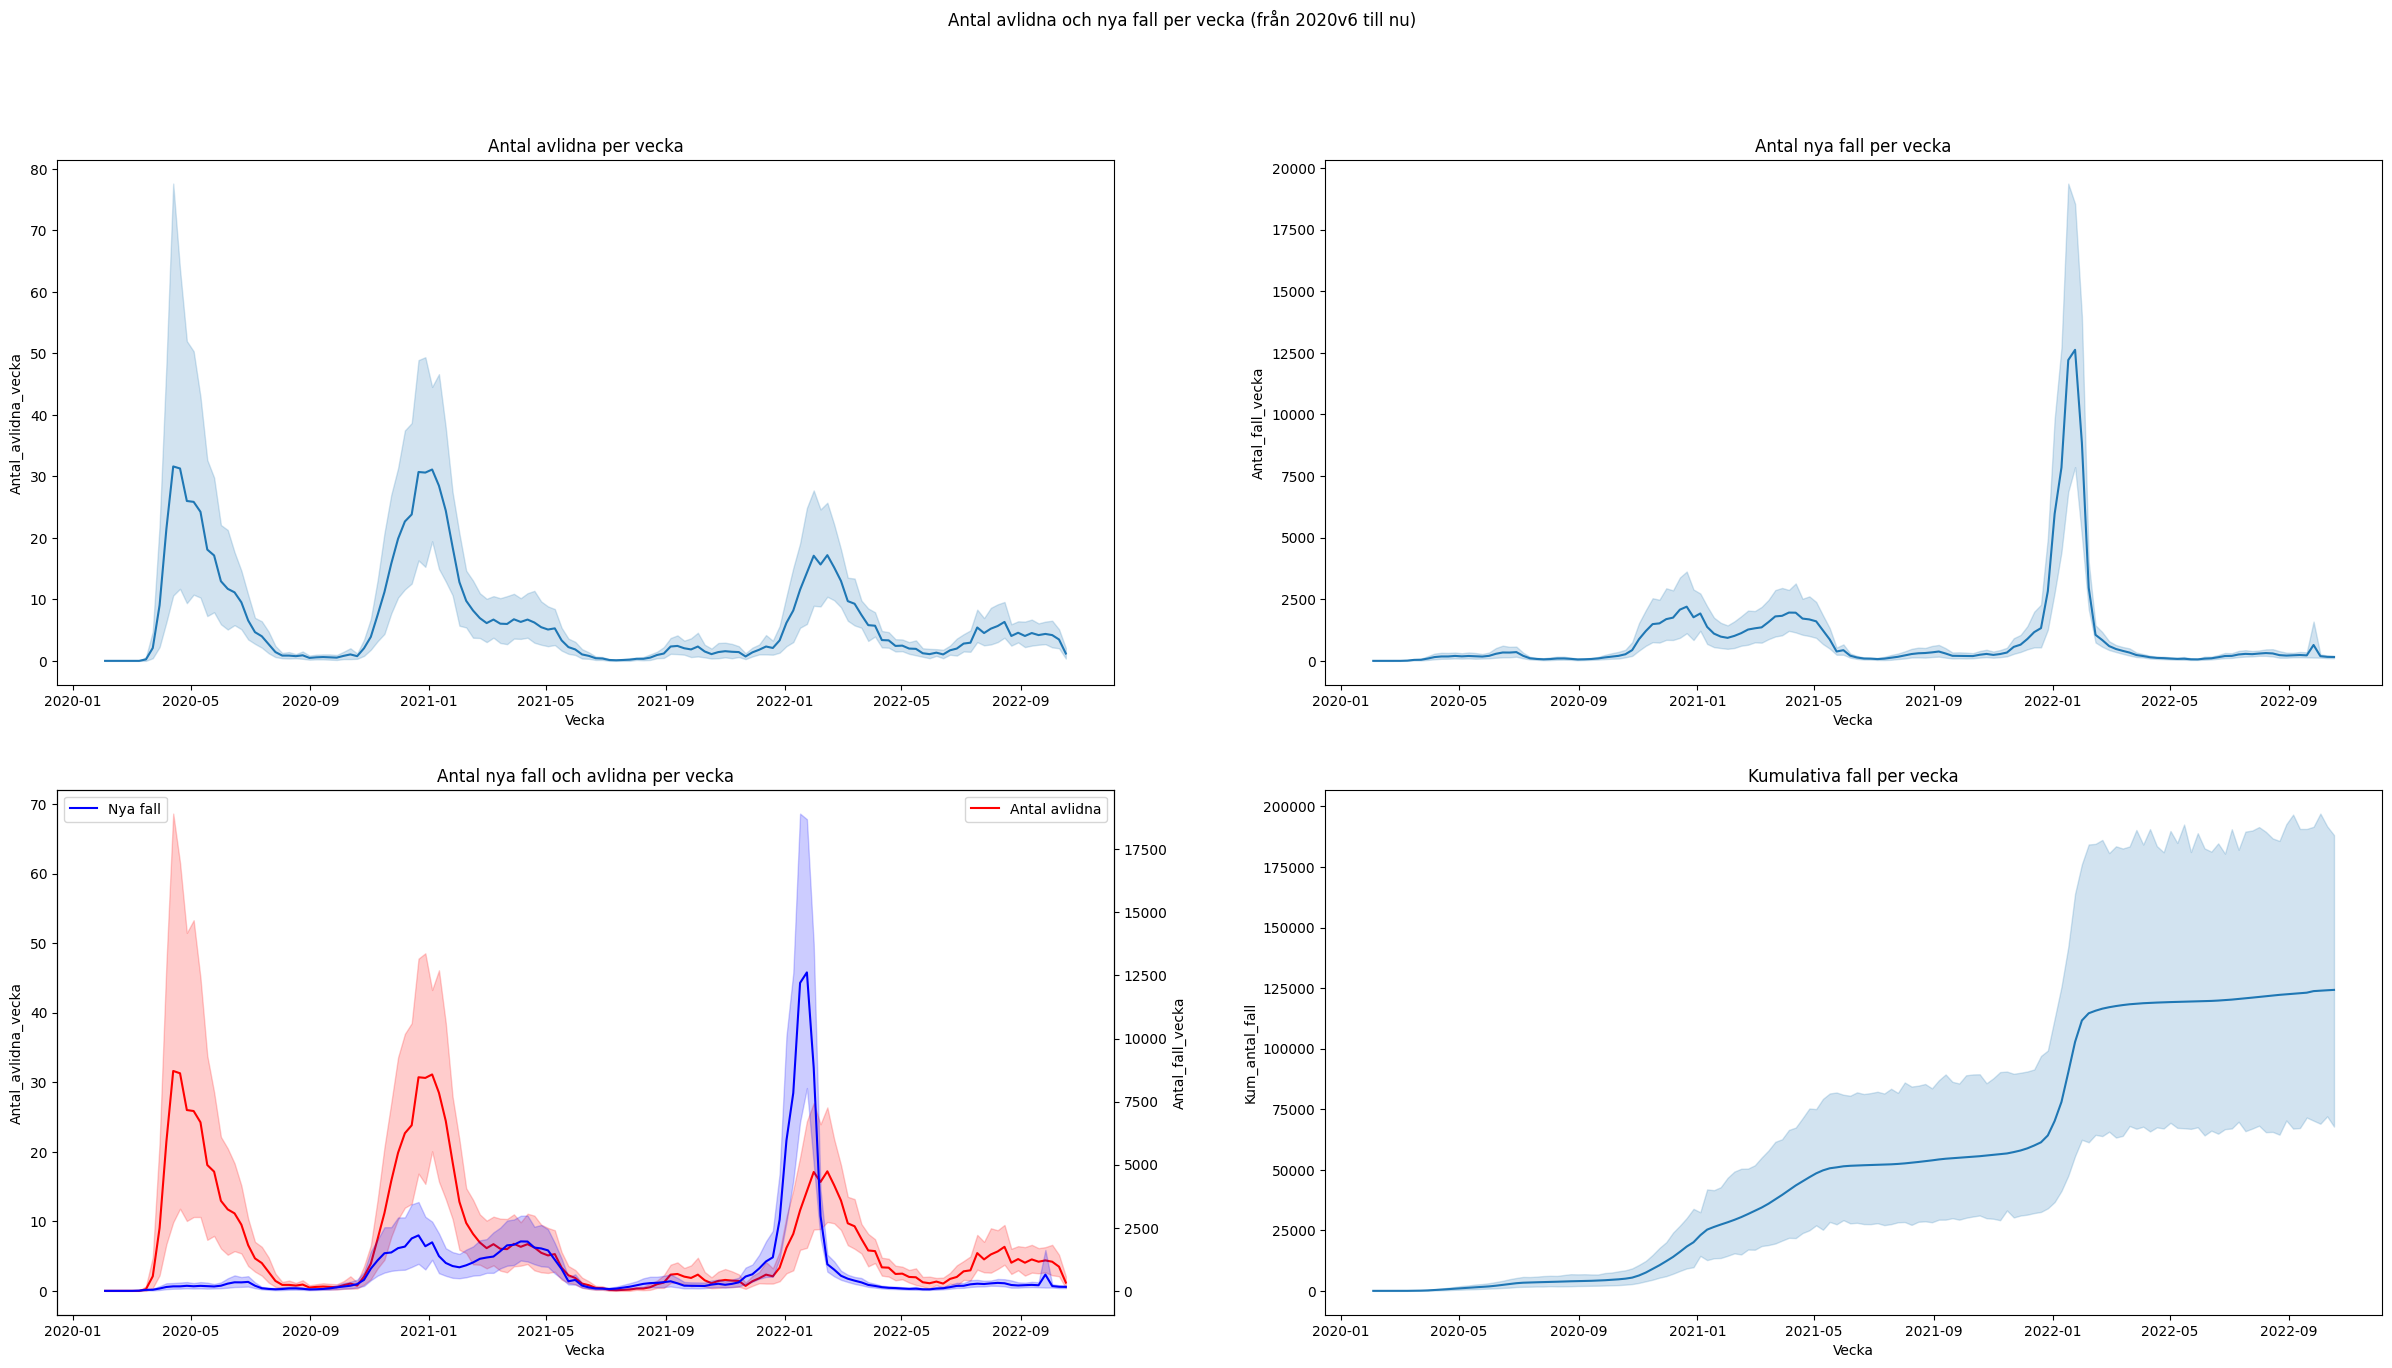

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel(excel_file_path, sheet_name=6)

df["Vecka"] = df["år"].astype(str) + "v" + df["veckonummer"].astype(str)

df["Vecka"] = pd.to_datetime(df["Vecka"] + "1", format="%Yv%W%w")  # Week starts on Monday

start_week = pd.to_datetime("2020-02-03")  # Week 6

df = df[df["Vecka"] >= start_week]

fig, axes = plt.subplots(2, 2, figsize=(30, 15))

fig.suptitle("Antal avlidna och nya fall per vecka (från 2020v6 till nu)")

# Plotting total deaths per week
sns.lineplot(x="Vecka", y="Antal_avlidna_vecka", data=df, ax=axes[0, 0])

axes[0, 0].set_title("Antal avlidna per vecka")

# Plotting new cases
sns.lineplot(x="Vecka", y="Antal_fall_vecka", data=df, ax=axes[0, 1])

axes[0, 1].set_title("Antal nya fall per vecka")

# Plotting deaths and cases in one figure
sns.lineplot(x="Vecka", y="Antal_avlidna_vecka", data=df, ax=axes[1, 0], label="Antal avlidna", color="red")

axes[1, 0].set_title("Antal nya fall och avlidna per vecka")

ax3 = axes[1, 0].twinx()

sns.lineplot(x="Vecka", y="Antal_fall_vecka", data=df, ax=ax3, label="Nya fall", color="blue")

sns.lineplot(x="Vecka", y="Kum_antal_fall", data=df, ax=axes[1, 1])

axes[1, 1].set_title("Kumulativa fall per vecka")

plt.legend(loc="upper left")
plt.show()


### Plotly diagram för antal fall och antal avlidna


In [5]:
import plotly.express as px

df = pd.read_excel(excel_file_path, sheet_name=6)
df["Vecka"] = df["år"].astype(str) + "v" + df["veckonummer"].astype(str)

df["Vecka"] = pd.to_datetime(df["Vecka"] + "1", format="%Yv%W%w")  # Week starts on Monday

start_week = pd.to_datetime("2020-02-03")  # Week 6

df = df[df["Vecka"] >= start_week]

fig = px.line(df, x="Vecka", y=["Antal_avlidna_vecka", "Antal_fall_vecka", "Kum_antal_fall"],
              title="Antal avlidna och nya fall per vecka", labels={"value": "Antal"},
              line_dash_sequence=["solid", "dash", "dot"])
fig.show()
# fig.write_html("plotly_figure1.html")

